In [15]:
import pandas as pd

train_df = pd.read_csv("train.csv", header=None, names=["label", "title", "text"])
test_df  = pd.read_csv("test.csv", header=None, names=["label", "title", "text"])  

train_df.head()


,label,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [16]:
train_df['label'].isnull().sum()

np.int64(0)

In [17]:
train_df['label'] = train_df['label'].map({1:0,2:1})

In [18]:
test_df['label'] = test_df['label'].map({1:0,2:1})

In [19]:
train_df['Combined'] = train_df["title"].fillna("") + " " + train_df["text"].fillna("")

In [20]:
test_df['Combined'] = test_df["title"].fillna("") + " " + test_df["text"].fillna("")

In [21]:
print(test_df.head(1))
print(train_df.head(1))

   label     title                                               text  \
0      1  Great CD  My lovely Pat has one of the GREAT voices of h...   

                                            Combined  
0  Great CD My lovely Pat has one of the GREAT vo...  
   label                           title  \
0      1  Stuning even for the non-gamer   

                                                text  \
0  This sound track was beautiful! It paints the ...   

                                            Combined  
0  Stuning even for the non-gamer This sound trac...  


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [23]:
X_train = train_df['Combined'].astype(str)
y_train = train_df['label'].astype(int)

baseline = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=50000)),
    ("model", LogisticRegression(max_iter=5000, class_weight='balanced'))
])

baseline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=50000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=5000))])

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
X_test = test_df['Combined'].astype(str)
y_test = test_df['label'].astype(int)

pred = baseline.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91    200000
           1       0.91      0.92      0.91    200000

    accuracy                           0.91    400000
   macro avg       0.91      0.91      0.91    400000
weighted avg       0.91      0.91      0.91    400000



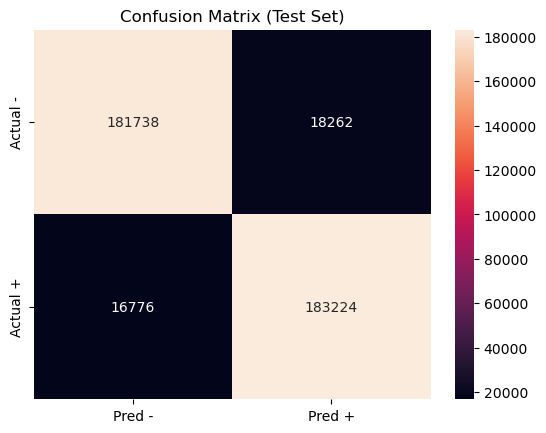

In [26]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d",
    xticklabels=["Pred -", "Pred +"],
    yticklabels=["Actual -", "Actual +"])
plt.title("Confusion Matrix (Test Set)")
plt.show()